In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [68]:
proj = '56Fe'
trg = '141Pr'
cn = '197At'
bf = 0.66
ch = 'xn'

file_name10 = proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_' + 'barfac' + str(bf) + '.dat'
file_name0 = proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_' + 'barfac' + str(bf) + '.dat'
print(file_name10, file_name0)

56Fe_141Pr_197At_xn_IFUS10_barfac0.66.dat 56Fe_141Pr_197At_xn_IFUS0_barfac0.66.dat


In [69]:
df10 = pd.read_csv('data/' + file_name10, sep='\t')
df0 = pd.read_csv('data/' + file_name0, sep='\t')
df_exp = pd.read_csv('data/exp_data.dat', sep='\t')

In [70]:
df10.head()

,E_lab,E*/MeV,191At,192At,193At,194At,195At,196At,197At
0,225.249,21.0,0.0,0.0,0.0,0.0,1.250000e-11,4.350000e-09,7.100000e-13
1,226.647,22.0,0.0,0.0,0.0,0.0,3.220000e-10,1.220000e-08,8.220000e-13
2,228.044,23.0,0.0,0.0,0.0,0.0,4.470000e-09,3.280000e-08,0.000000e+00
3,229.441,24.0,0.0,0.0,0.0,0.0,4.440000e-08,8.500000e-08,0.000000e+00
4,230.838,25.0,0.0,0.0,0.0,0.0,3.590000e-07,2.120000e-07,0.000000e+00


In [71]:
df0.head()

,E_lab,E*/MeV,191At,192At,193At,194At,195At,196At,197At
0,237.824,30.0,0.0,0.0,0.0,5.870000e-15,4.440000e-10,5.730000e-13,0.0
1,239.221,31.0,0.0,0.0,0.0,3.870000e-13,8.630000e-10,8.670000e-13,0.0
2,240.618,32.0,0.0,0.0,0.0,1.120000e-10,1.750000e-07,1.910000e-09,0.0
3,242.015,33.0,0.0,0.0,0.0,3.630000e-09,8.530000e-07,9.300000e-09,0.0
4,243.413,34.0,0.0,0.0,0.0,4.750000e-08,1.810000e-06,1.720000e-08,0.0


In [72]:
dfm10_mb = df10.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')
dfm0_mb = df0.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')
dfm_exp_mb = df_exp.melt(id_vars=['E_lab', 'E*'], var_name='isotope', value_name='CS')

#scale the data to either nb, ub or whatever
dfm10 = dfm10_mb
dfm0 = dfm0_mb
dfm_exp = dfm_exp_mb

dfm10['CS'] = dfm10_mb['CS']*1E6
dfm0['CS'] = dfm0_mb['CS']*1E6
dfm_exp['CS'] = dfm_exp_mb['CS']*1E6
dfm_exp

,E_lab,E*,isotope,CS
0,235,28,194At_{Boris},19.0
1,243,34,194At_{Boris},180.0
2,252,40,194At_{Boris},800.0
3,266,50,194At_{Boris},180.0
4,235,28,195At_{Boris},260.0
5,243,34,195At_{Boris},130.0
6,252,40,195At_{Boris},38.0
7,266,50,195At_{Boris},2.7


/home/adam/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


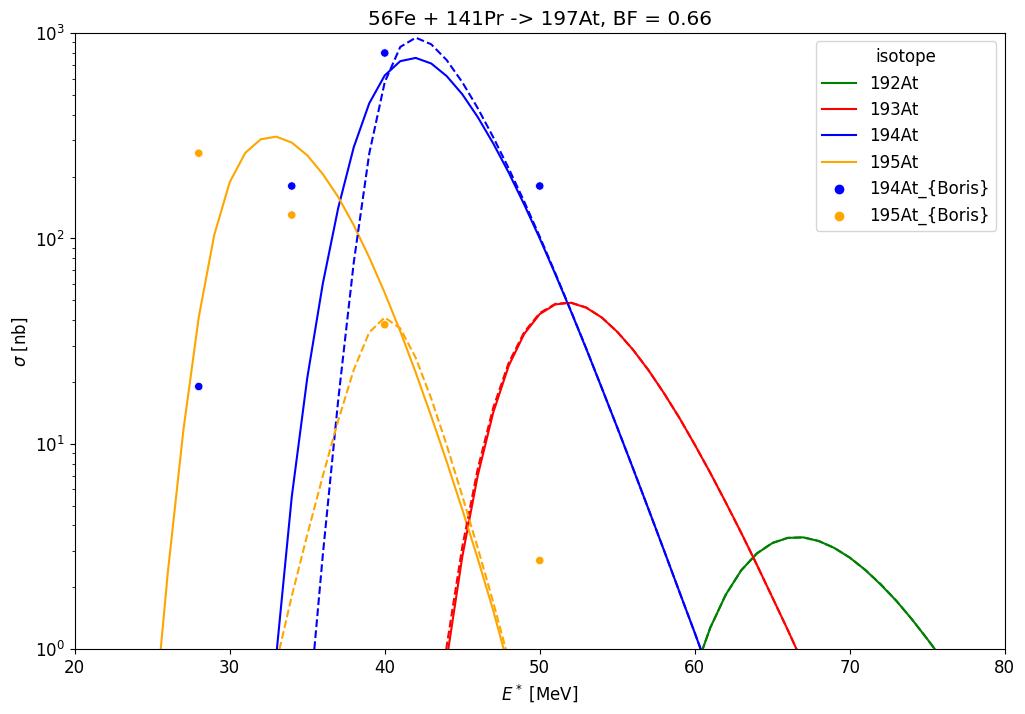

In [79]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x='E*/MeV', y='CS', hue='isotope', data=dfm10[dfm10['isotope'].isin(list(df10.columns[3:-2]))], palette=['green', 'red', 'blue', 'orange'])
plt.semilogy()
plt.ylim(1e-0, 1e3)
# plt.xlim(right=50)
plt.xlim(20, 80)
plt.title(proj + ' + ' + trg + ' -> ' + cn + ', BF = ' + str(bf))
plt.ylabel('$\sigma$ [nb]')
plt.xlabel('$E^*$ [MeV]')
plt.legend(loc='upper right')

sns.lineplot(x='E*/MeV', y='CS', hue='isotope', data=dfm0[dfm0['isotope'].isin(list(df10.columns[3:-2]))], linestyle='--', legend=None, palette=['green', 'red', 'blue', 'orange'])

sns.scatterplot(x='E*', y='CS', hue='isotope', data=dfm_exp, palette=['blue', 'orange'])

plt.rcParams.update({'font.size': 12})

plt.savefig(proj + '_' + trg + '_' + cn + '_' + ch + '_' + '_' + 'barfac' + str(bf) + '_massesUpdated' + '.pdf')